# Simple Linear Regression  

#### - Peprocessing

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [2]:
# import the dataset 
dataset = pd.read_csv('../datasets/Salary_Data.csv')
print(dataset.head())
x = dataset[['YearsExperience']]
y = dataset['Salary']
# note : no need for missisg ,cat date

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [3]:
# splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =1/3, random_state = 0)
# note : no need for scalling data

/home/mahmoud/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


#### Model and Prediction 

In [4]:
from sklearn.linear_model import LinearRegression
sim_lin_RegModel = LinearRegression()              # creating the model 
sim_lin_RegModel.fit(x_train, y_train)             # train and fit the model
y_predict = sim_lin_RegModel.predict(x_test)       # predicted y

#### Comparison 

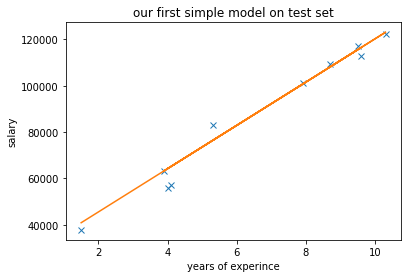

In [5]:
plt.plot(x_test, y_test,'x', x_test, y_predict, '-')
plt.title('our first simple model on test set')
plt.xlabel('years of experince')
plt.ylabel('salary')
plt.show()

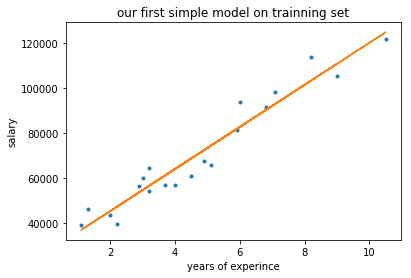

In [6]:
plt.plot(x_train, y_train,'.', x_train, sim_lin_RegModel.predict(x_train), '-')
plt.title('our first simple model on trainning set')
plt.xlabel('years of experince')
plt.ylabel('salary')
plt.show()

### Optional

* Cost function 
we will only work with 1d 

In [7]:
# importing new data 
data = np.loadtxt('../datasets/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

In [8]:
def compute_cost(x, y, theta=[[0],[0]] ):
    m = y.size
    J = 0
    h = x.dot(theta)                 # note that first column should be 1 as it multiplied by theta[1] = theta_node
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

* Gradient Descent

In [9]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.5, num_iters=200):
    m = y.size
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = compute_cost(X, y, theta)
    return(theta, J_history)

theta:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]


/home/mahmoud/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/home/mahmoud/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/mahmoud/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


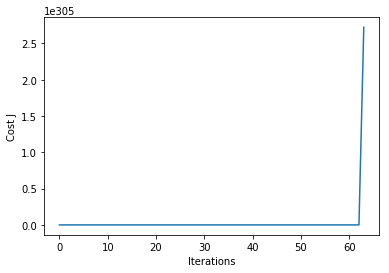

In [10]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y_train.iloc[:].values) 
print('theta: ',theta.ravel())
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

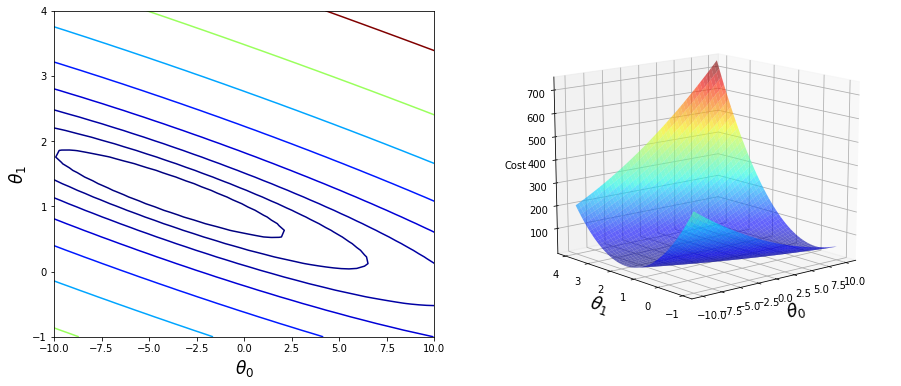

In [11]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = compute_cost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

In [12]:
compute_cost(X, y)        # at the default value with theta_0  = 0 , theta_1 = 0

32.072733877455676

* Gradient Descent

# Multiple Linear Regression

#### - Preprocessing

In [13]:
# importing Libraries  --> louded
# importing data 
dataset = pd.read_csv('../datasets/50_Startups.csv')
x = dataset.iloc[:, :-1].values   # all except the last one
y = dataset.iloc[:, -1].values    # the last one
# no missing data exist

In [14]:
# categorical data 
# note : as using iloc[:,:].values : it will be arrays not dataframe
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
x[:,3] = LabelEncoder().fit_transform(x[:,3])
x = OneHotEncoder(categorical_features=[3]).fit_transform(x).toarray()
# no scalling needed as data nearly at the same scale

In [15]:
# splitting
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

/home/mahmoud/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### - Model and Prediction

In [16]:
from sklearn.linear_model import LinearRegression
mul_lin_RegModel = LinearRegression()
mul_lin_RegModel.fit(x_train, y_train)
y_predict = mul_lin_RegModel.predict(x_test)

#### - Comparison

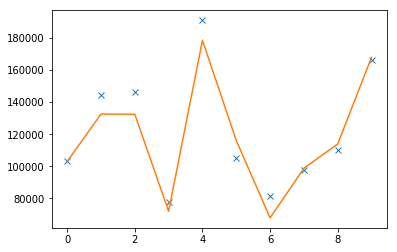

In [17]:
plt.plot(y_test, 'x', y_predict, '-')
plt.show()

# Polynomial Regression

#### - preprocessing

In [18]:
# importing Libraries  --> louded
# importing data 
dataset = pd.read_csv('../datasets/Position_Salaries.csv')

In [19]:
dataset = dataset.drop(labels='Position',axis=1)
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values
dataset.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [28]:
# no missing data
# categorical data
#if dataset['Position'].nunique() == len(dataset['Position']) :  
#    print("no label codes needed")
# from this code we delete the column Position

In [20]:
# splitting 
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/home/mahmoud/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mahmoud/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mahmoud/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### - Model and Prediction

In [21]:
from sklearn.preprocessing import PolynomialFeatures
x_train_poly = PolynomialFeatures(degree = 2).fit_transform(x_train)    # degree is the degree of polynomial
x_test_poly = PolynomialFeatures(degree = 2).fit_transform(x_test)    # degree is the degree of polynomial

from sklearn.linear_model import LinearRegression
pol_RegModel = LinearRegression()
pol_RegModel.fit(x_train_poly, y_train)
y_predict = pol_RegModel.predict(x_test_poly)

#### - Comparison

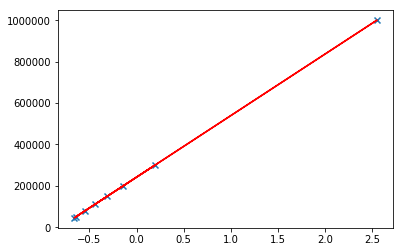

In [22]:
# on the trainning data
plt.scatter(x_train, y_train,marker='x')
plt.plot(x_train, pol_RegModel.predict(x_train_poly), color = 'r')